essential imports for the project

In [129]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import kurtosis, skew

reading in the file 

In [89]:
df = pd.read_csv('..//output//final.csv')

exploring the data

In [90]:
df.head()

,Graph_number,Number_of_vertices,starting_colour_vertex,ending_colour_vertex,step_time,cycle
0,1,2,"[1, 1]","[1, 1]",1,1
1,1,2,"[1, -1]","[1, -1]",1,2
2,1,3,"[1, 1, 1]","[1, 1, 1]",1,1
3,1,3,"[1, 1, -1]","[1, 1, 1]",2,1
4,1,3,"[1, -1, 1]","[1, 1, 1]",2,1


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866498 entries, 0 to 866497
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Graph_number            866498 non-null  int64 
 1   Number_of_vertices      866498 non-null  int64 
 2   starting_colour_vertex  866498 non-null  object
 3   ending_colour_vertex    866498 non-null  object
 4   step_time               866498 non-null  int64 
 5   cycle                   866498 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 39.7+ MB


In [92]:
df[['cycle', 'step_time']].describe()

,cycle,step_time
count,866498.000000,866498.000000
mean,1.159431,2.535094
std,0.366078,1.119478
min,1.000000,1.000000
25%,1.000000,2.000000
50%,1.000000,2.000000
75%,1.000000,3.000000
max,2.000000,7.000000


feature engineering 

In [94]:
step_time_value_counts = df['step_time'].value_counts()
print(step_time_value_counts)

2    368108
3    226648
1    126398
4     89184
5     41040
6     13680
7      1440
Name: step_time, dtype: int64


In [116]:
step_time_value_counts_percent = dict(df.step_time.value_counts(normalize=True) * 100)
for k, v in step_time_value_counts_percent.items():
    step_time_value_counts_percent[k] = round(v, 1)

print(step_time_value_counts_percent)

{2: 42.5, 3: 26.2, 1: 14.6, 4: 10.3, 5: 4.7, 6: 1.6, 7: 0.2}


In [117]:
df['percent'] = df['step_time'].map(step_time_value_counts_percent)
df.head()

,Graph_number,Number_of_vertices,starting_colour_vertex,ending_colour_vertex,step_time,cycle,percent
0,1,2,"[1, 1]","[1, 1]",1,1,14.6
1,1,2,"[1, -1]","[1, -1]",1,2,14.6
2,1,3,"[1, 1, 1]","[1, 1, 1]",1,1,14.6
3,1,3,"[1, 1, -1]","[1, 1, 1]",2,1,42.5
4,1,3,"[1, -1, 1]","[1, 1, 1]",2,1,42.5


Visualising the percent of step time values

In [118]:
sns.set_style("whitegrid")
sns.despine()

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

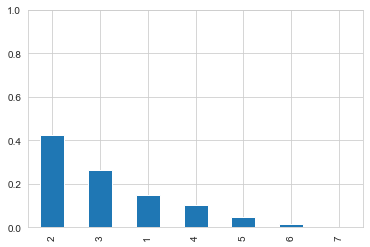

In [119]:
plt.ylim(0, 1)
df.step_time.value_counts(normalize=True).plot(kind='bar')

<AxesSubplot:xlabel='Number_of_vertices', ylabel='percent'>

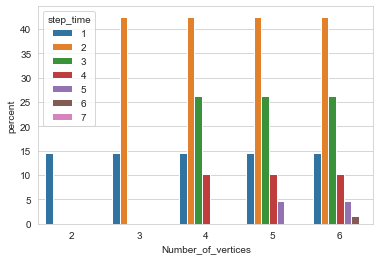

In [120]:
sns.barplot(x=df['Number_of_vertices'], y=df['percent'], hue=df['step_time'], data=df)

Skew and kurtosis values and plots

In [137]:
step_skew = skew(df['step_time'])
percent_skew = skew(df['percent'])
cycle_skew = skew(df['cycle'])
step_kurt = kurtosis(df['step_time'], fisher=True)
percent_kurt = kurtosis(df['percent'], fisher=True)
cycle_kurt = kurtosis(df['step_time'], fisher=True)

print("step_kurt = {}\n"
      "step_skew = {}\n"
      "cycle_kurt = {}\n"
      "cycle_skew = {}\n"
      "percent_kurt = {}\n"
      "percent_skew = {}\n"
      .format(step_kurt, step_skew, cycle_kurt, cycle_skew, percent_kurt, percent_skew))

step_kurt = 0.8300835105937208
step_skew = 0.9059689743511474
cycle_kurt = 0.8300835105937208
cycle_skew = 1.8606344554000638
percent_kurt = -1.3578594511310051
percent_skew = -0.2933669204845916



(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.79336692, -0.69336692, -0.59336692, -0.49336692, -0.39336692,
        -0.29336692, -0.19336692, -0.09336692,  0.00663308,  0.10663308,
         0.20663308]),
 <BarContainer object of 10 artists>)

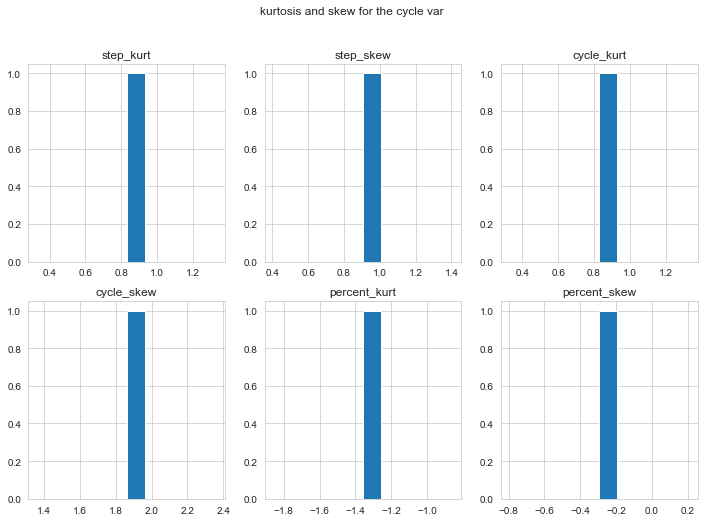

In [148]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(12, 8)
fig.suptitle('kurtosis and skew for the cycle var')
axs[0, 0].title.set_text('step_kurt')
axs[0, 1].title.set_text('step_skew')
axs[0, 2].title.set_text('cycle_kurt')
axs[1, 0].title.set_text('cycle_skew')
axs[1, 1].title.set_text('percent_kurt')
axs[1, 2].title.set_text('percent_skew')
axs[0, 0].hist(step_kurt, bins=10)
axs[0, 1].hist(step_skew, bins=10)
axs[0, 2].hist(cycle_kurt, bins=10)
axs[1, 0].hist(cycle_skew, bins=10)
axs[1, 1].hist(percent_kurt, bins=10)
axs[1, 2].hist(percent_skew, bins=10)